In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import roc_curve, f1_score
warnings.filterwarnings('ignore')

# BaseLine

Так как присутствует дисбаланс классов, то логистическая регрессия будет предсказывать хорошо только "не покупателей"
исходя из этого accuracy плохая метрика, будем использовать roc-auc

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
data = pd.get_dummies(data=data,columns=['Month', 'VisitorType'],drop_first=True)

In [4]:
X = data.drop('Revenue', axis=1)
y = data['Revenue']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9864, 26) (2466, 26) (9864,) (2466,)


In [5]:
logreg=LogisticRegression()

logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

print(' ROC-AUC score: ', roc_auc_score(y_test, y_pred_prob), '\n', 'F1-Score: ', f1_score(y_test, y_pred), '\n', 'Garmonical mean: ', 2 * (roc_auc_score(y_test, y_pred_prob) * f1_score(y_test, y_pred)) / (roc_auc_score(y_test, y_pred_prob) + f1_score(y_test, y_pred)))

 ROC-AUC score:  0.8100295404360619 
 F1-Score:  0.4707792207792208 
 Garmonical mean:  0.5954754330268698


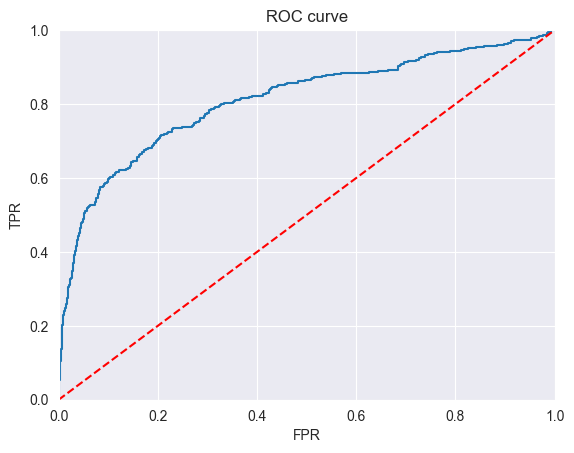

In [6]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'r--')
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)

# Анализ данных
#### План:
1. Разбить данные на обучающую и тестовую выборку
2. Проверка данных на nan-ы и выбросы
3. Проанализировать признаки
4. Саммари

In [7]:
# импортируем данные
data = pd.read_csv('online_shoppers_intention.csv')

In [8]:
# разбиение на тест и трейн

x_train, x_test, y_train, y_test = train_test_split(
    data.drop('Revenue', axis=1),
    data['Revenue'],
    test_size=0.20,
    random_state=42
)

x_train['Revenue'] = y_train
x_test['Revenue'] = y_test
data_train = x_train
data_test = x_test

data_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1785,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,Mar,2,6,1,1,Returning_Visitor,False,False
10407,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,Nov,2,2,3,2,Returning_Visitor,False,False
286,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
6520,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,Sep,2,2,8,2,New_Visitor,False,False
12251,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,Nov,3,2,7,8,New_Visitor,True,False


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [10]:
# проверка на наличие nan-ов
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
# Количество уникальных значений в столбце
data.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [12]:
# Количество купивших товар или нет
print('Revenue percentage ', round(data['Revenue'].value_counts()[1]/(data['Revenue'].value_counts()[0] + data['Revenue'].value_counts()[1]) * 100, 3), '%')
data['Revenue'].value_counts()
# диссбаланс классов ! => ROC-AUC или презижн/рекол

Revenue percentage  15.474 %


False    10422
True      1908
Name: Revenue, dtype: int64

In [13]:
data_train.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

Парные признаки могут быть сильно скоррелированы поэтому не понадобятся в предсказании
Посмотреть распределение Revenue от SpecialDay, Month, Weekend, Browser, Region, OperatingSystem, TrafficType - потому что покупой ближе к праздникам больше или на выходных и тд.

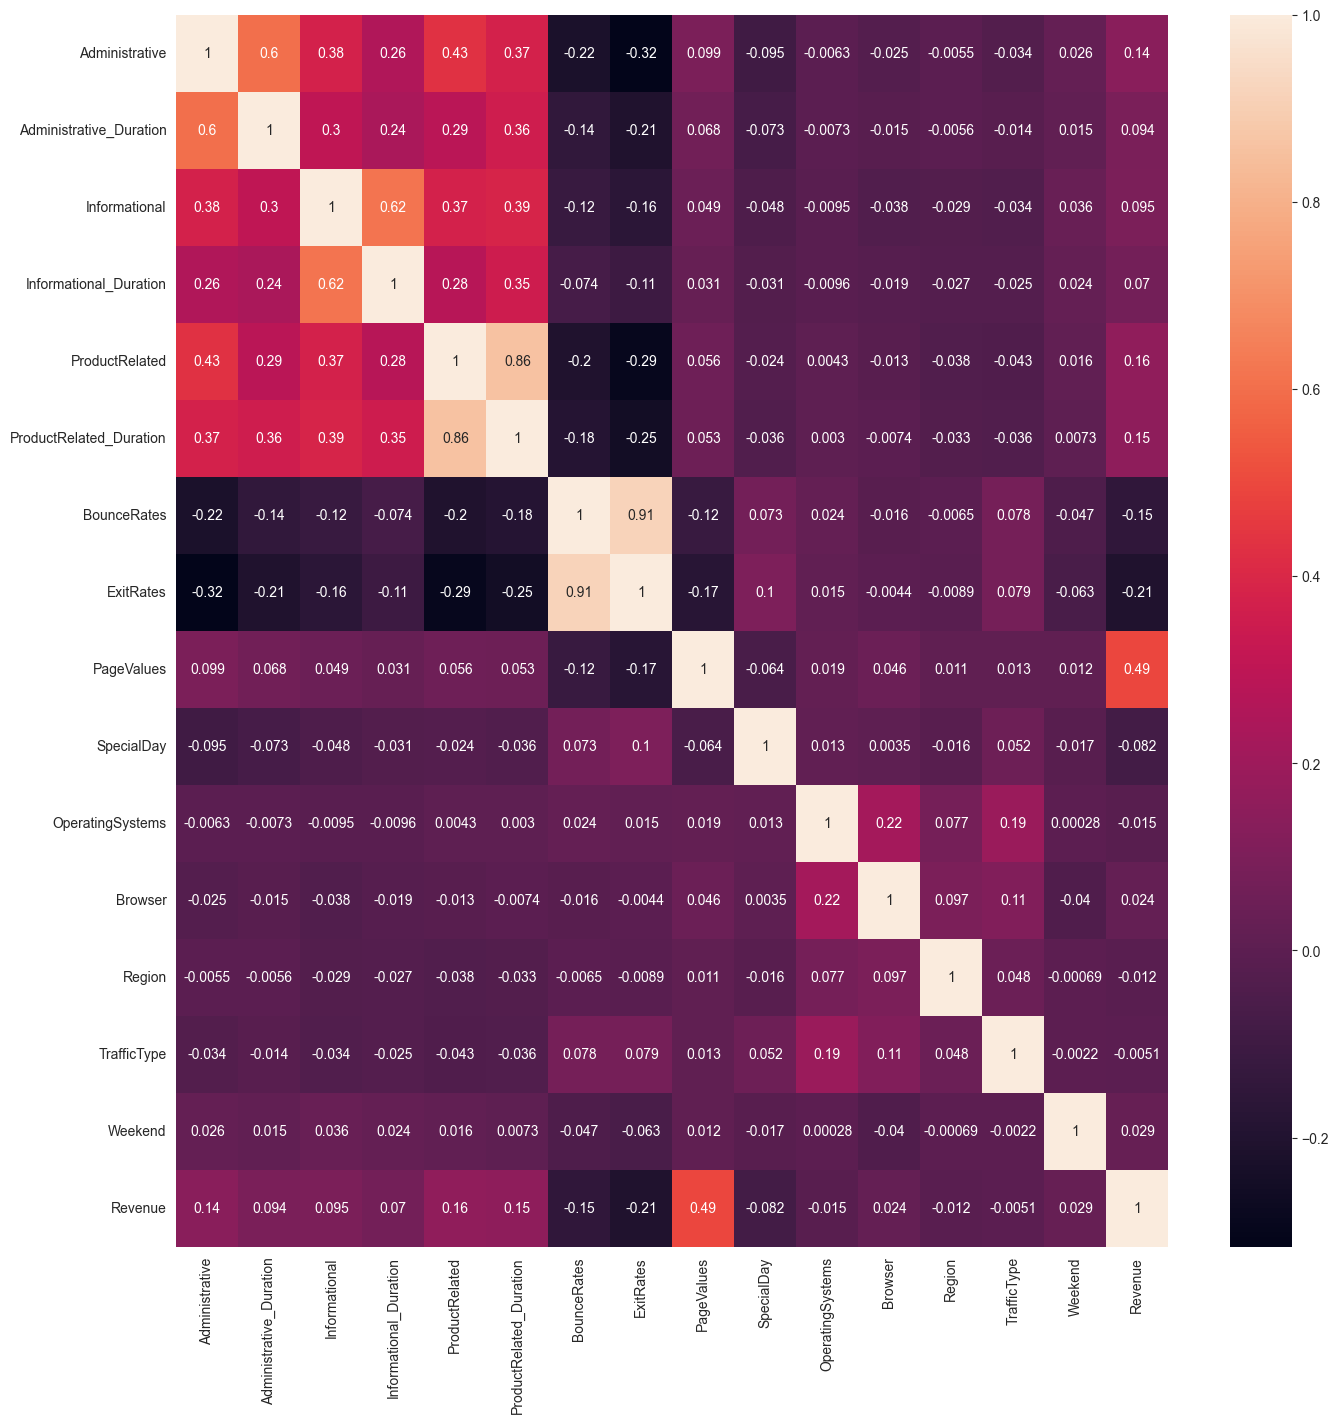

In [14]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot = True)
plt.show()

Видно что BounceRate и ExitRate сильно коррелируют, аналогично и Informational, productRelated, Administrative cо своими Duartions соответсвтенно можешь дропнуть один парный столбец
Столбец PageValues убирать нельзя потому что у него большая корреляция с Revenue

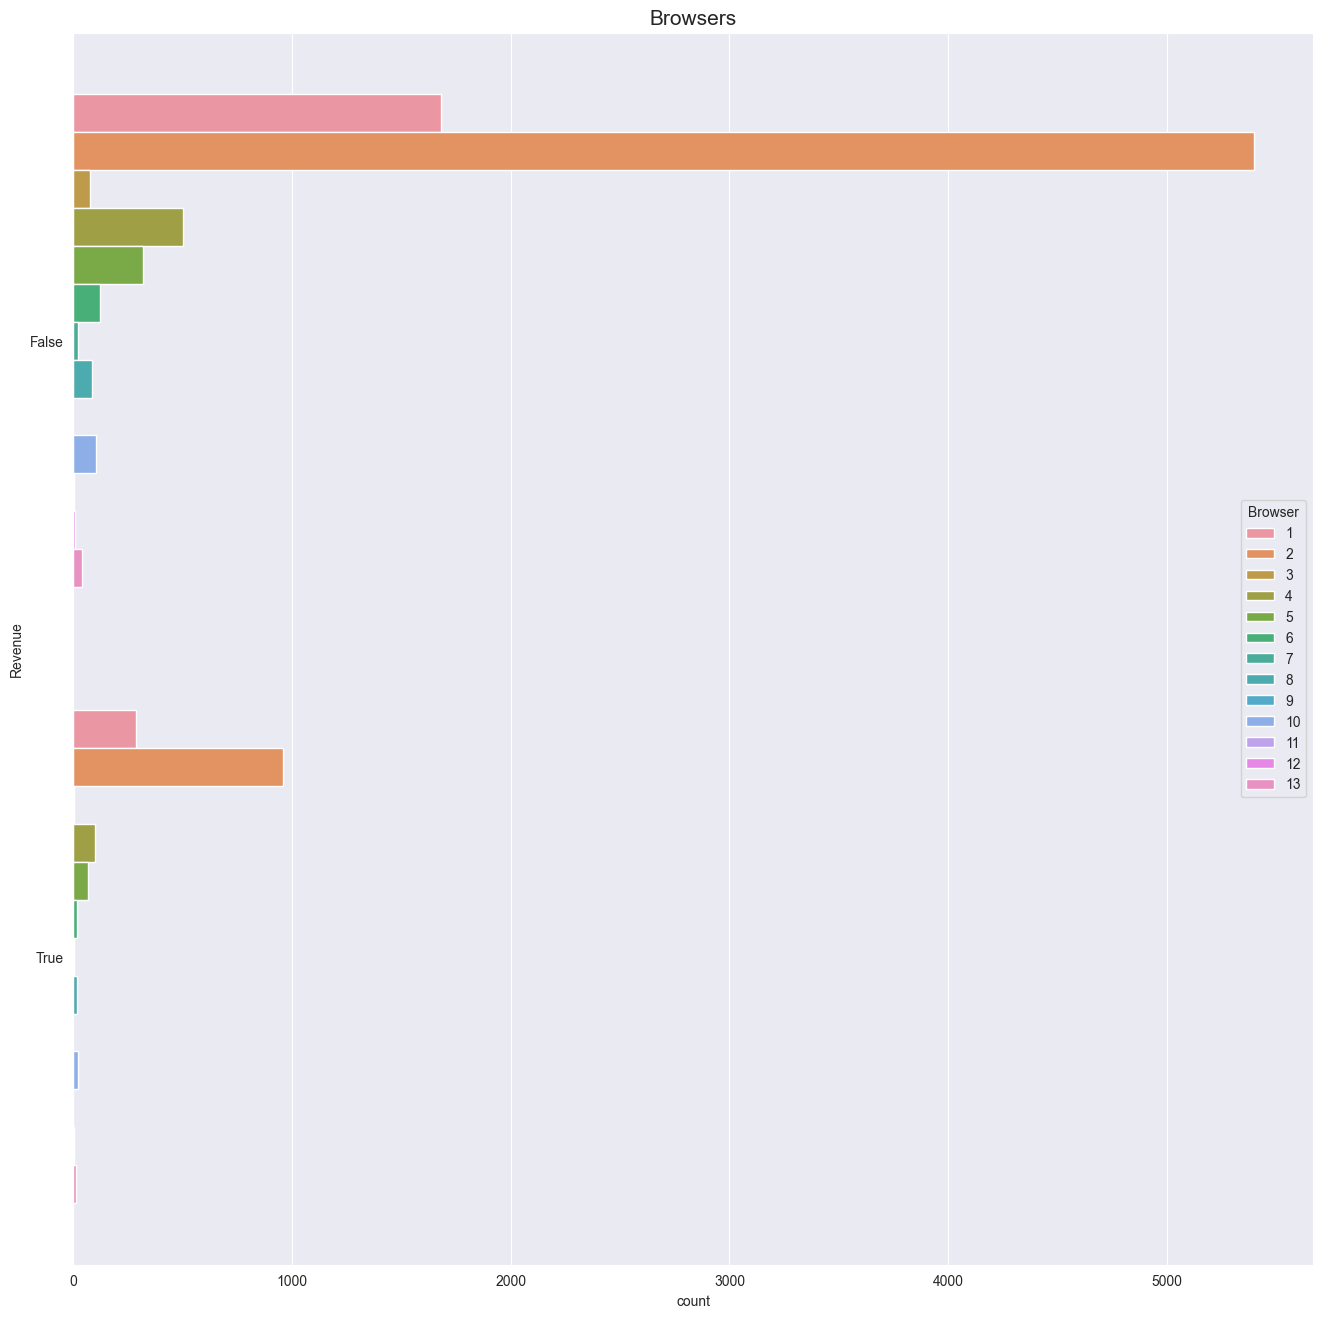

In [15]:
# Одинаковые распреления
plt.figure(figsize=(16,16))
sns.countplot(y ='Revenue', hue = "Browser", data = data_train)
plt.title('Browsers', fontsize=15)
plt.show()

In [16]:
dist_of_purchase = data_train.loc[data_train['Revenue'] == 1, ['Browser']].value_counts() / (data_train.loc[data_train['Revenue'] == 1, ['Browser']].count())[0] * 100
dist_of_decline = data_train.loc[data_train['Revenue'] == 0, ['Browser']].value_counts() / (data_train.loc[data_train['Revenue'] == 0, ['Browser']].count())[0] * 100

pd.DataFrame({'Purchase': dist_of_purchase, 'Decline': dist_of_decline})

,Purchase,Decline
Browser,,
1,19.171677,20.078881
2,64.128257,64.515358
3,0.334001,0.944185
4,6.680027,5.987809
5,4.542418,3.812597
6,1.135605,1.482013
7,0.267201,0.286841
8,1.068804,1.039799
9,NaN,0.011952


Видна разница в зависимости от браузера, но распредления на покупку и не покупку похожи, поэтому нет смысла держать данный столбец

Аналогичные гипотезы можно применить и к столбцам SpecialDay, Month, Weekend, Region, OperatingSystem

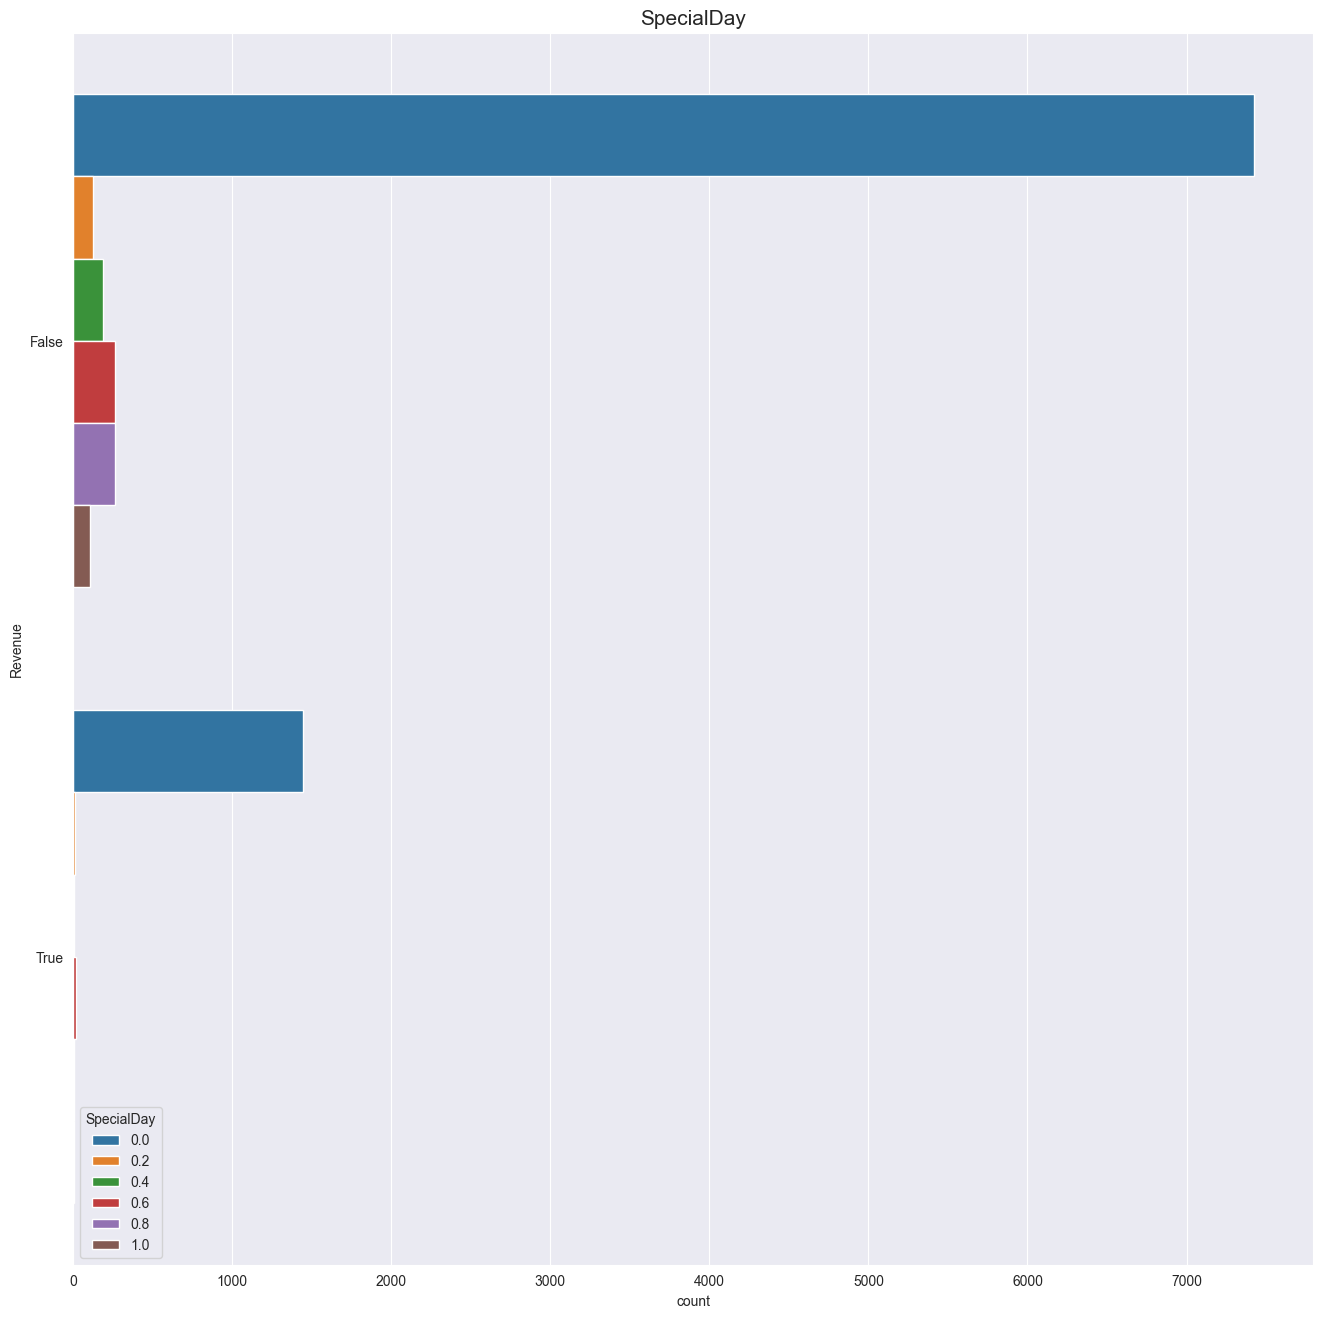

In [17]:
plt.figure(figsize=(16,16))
sns.countplot(y ='Revenue', hue = "SpecialDay", data = data_train)
plt.title('SpecialDay', fontsize=15)
plt.show()

In [18]:
dist_of_purchase = data_train.loc[data_train['Revenue'] == 1, ['SpecialDay']].value_counts() / (data_train.loc[data_train['Revenue'] == 1, ['SpecialDay']].count())[0] * 100
dist_of_decline = data_train.loc[data_train['Revenue'] == 0, ['SpecialDay']].value_counts() / (data_train.loc[data_train['Revenue'] == 0, ['SpecialDay']].count())[0] * 100

pd.DataFrame({'Purchase': dist_of_purchase, 'Decline': dist_of_decline})

,Purchase,Decline
SpecialDay,,
0.0,96.526386,88.741484
0.2,0.801603,1.493964
0.4,0.534402,2.211067
0.6,1.336005,3.119398
0.8,0.467602,3.131349
1.0,0.334001,1.302737


видно что большинство заказов делается в дни далеко находящиеся от какого-то праздника, соответственно данный столбец становится бесполезным потому что разброс может очень большим

Аналогичо ситуации с Браузерами уберем этот столбец

In [19]:
dist_of_purchase = data_train.loc[data_train['Revenue'] == 1, ['Weekend']].value_counts() / (data_train.loc[data_train['Revenue'] == 1, ['Weekend']].count())[0] * 100
dist_of_decline = data_train.loc[data_train['Revenue'] == 0, ['Weekend']].value_counts() / (data_train.loc[data_train['Revenue'] == 0, ['Weekend']].count())[0] * 100

pd.DataFrame({'Purchase': dist_of_purchase, 'Decline': dist_of_decline})

,Purchase,Decline
Weekend,,
False,74.615898,77.674196
True,25.384102,22.325804


Аналогичо ситуации с Браузерами уберем этот столбец

In [20]:
dist_of_purchase = data_train.loc[data_train['Revenue'] == 1, ['Region']].value_counts() / (data_train.loc[data_train['Revenue'] == 1, ['Region']].count())[0] * 100
dist_of_decline = data_train.loc[data_train['Revenue'] == 0, ['Region']].value_counts() / (data_train.loc[data_train['Revenue'] == 0, ['Region']].count())[0] * 100

pd.DataFrame({'Purchase': dist_of_purchase, 'Decline': dist_of_decline})

,Purchase,Decline
Region,,
1,40.213761,38.484523
2,10.220441,9.059400
3,18.236473,19.696426
4,8.750835,9.609179
5,2.805611,2.689136
6,6.078824,6.453926
7,5.878424,5.975858
8,3.139613,3.848452
9,4.676019,4.183100


Аналогичо ситуации с Браузерами уберем этот столбец

In [21]:
dist_of_purchase = data_train.loc[data_train['Revenue'] == 1, ['OperatingSystems']].value_counts() / (data_train.loc[data_train['Revenue'] == 1, ['OperatingSystems']].count())[0] * 100
dist_of_decline = data_train.loc[data_train['Revenue'] == 0, ['OperatingSystems']].value_counts() / (data_train.loc[data_train['Revenue'] == 0, ['OperatingSystems']].count())[0] * 100

pd.DataFrame({'Purchase': dist_of_purchase, 'Decline': dist_of_decline})

,Purchase,Decline
OperatingSystems,,
1,20.307281,20.939405
2,61.055444,52.778774
3,13.293253,21.668459
4,4.275217,3.776742
5,0.066800,0.047807
6,0.133601,0.083662
7,0.066800,0.047807
8,0.801603,0.657344


Аналогичо ситуации с Браузерами уберем этот столбец

In [22]:
dist_of_purchase = data_train.loc[data_train['Revenue'] == 1, ['TrafficType']].value_counts() / (data_train.loc[data_train['Revenue'] == 1, ['TrafficType']].count())[0] * 100
dist_of_decline = data_train.loc[data_train['Revenue'] == 0, ['TrafficType']].value_counts() / (data_train.loc[data_train['Revenue'] == 0, ['TrafficType']].count())[0] * 100

pd.DataFrame({'Purchase': dist_of_purchase, 'Decline': dist_of_decline})

,Purchase,Decline
TrafficType,,
1,14.028056,20.724274
2,43.486974,29.711964
3,9.752839,18.214414
4,8.283233,8.497669
5,3.206413,1.983985
6,2.672011,3.681128
7,0.668003,0.239034
8,4.676019,2.414246
9,0.133601,0.358551


Тип трафика никак не влияет на покупку так, как это информация больше нужна всяким сетевым служдам, а не нам

Cтолбец VisitorType оставим так как очень вероятно что новые покупатели покупают чаще чем возвращающиеся, так как первые намерены купить что-то, а другие сомневаются ( конечно может быть и другая ситуация, но это достаточно весомый показатель как видно ниже), аналогично с месяцами, потому что это более глобальные показатели чем остальные и условно какой-то Декабрь или Февраль могут повысить процент покупок

In [23]:
dist_of_purchase = data_train.loc[data_train['Revenue'] == 1, ['VisitorType']].value_counts() / (data_train.loc[data_train['Revenue'] == 1, ['VisitorType']].count())[0] * 100
dist_of_decline = data_train.loc[data_train['Revenue'] == 0, ['VisitorType']].value_counts() / (data_train.loc[data_train['Revenue'] == 0, ['VisitorType']].count())[0] * 100

pd.DataFrame({'Purchase': dist_of_purchase, 'Decline': dist_of_decline})

,Purchase,Decline
VisitorType,,
Returning_Visitor,76.553106,87.163858
New_Visitor,22.511690,12.107087
Other,0.935204,0.729055


In [24]:
dist_of_purchase = data_train.loc[data_train['Revenue'] == 1, ['Month']].value_counts() / (data_train.loc[data_train['Revenue'] == 1, ['Month']].count())[0] * 100
dist_of_decline = data_train.loc[data_train['Revenue'] == 0, ['Month']].value_counts() / (data_train.loc[data_train['Revenue'] == 0, ['Month']].count())[0] * 100

pd.DataFrame({'Purchase': dist_of_purchase, 'Decline': dist_of_decline})

,Purchase,Decline
Month,,
Aug,4.008016,3.513804
Dec,11.690047,14.485479
Feb,0.133601,1.625433
Jul,3.674015,3.573563
June,1.402806,2.557667
Mar,9.485638,16.493367
May,18.837675,28.457034
Nov,39.879760,21.752121
Oct,6.346025,4.123342


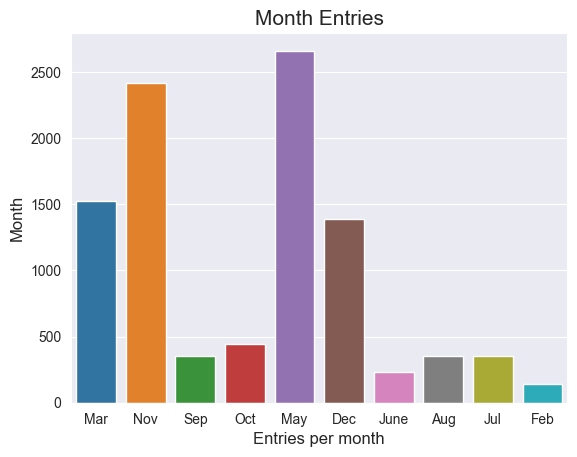

In [25]:
sns.countplot(data_train.Month)
plt.title('Month Entries', fontsize= 15)
plt.xlabel('Entries per month', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.show()

# Summary
- дисбаланс классов (надо стремиться к тому чтобы снизить ложные revenue, чтобы не завыщать ожидания на покупки, так как за этим последует большие денежные потери в плане закупок в магазин) -> будем просматривать f1-score и ROC-AUC
- Сильно скоррелированные столбцы
- Хоть и есть разница между ОСями, Браузерами, но они не велеки чтобы давать нужного вклада в обучение модели, вероятнее они больше переобучат ее чем научат



# Предобработка данных для модели

In [26]:
data = pd.read_csv('online_shoppers_intention.csv')

data = data.drop(['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'ExitRates', 'SpecialDay', 'OperatingSystems', 'TrafficType', 'Region', 'Browser', 'Weekend'], axis=1)

data = pd.get_dummies(data=data, columns=['Month', 'VisitorType'], drop_first=True)
data.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'BounceRates',
       'PageValues', 'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

# Создание модели

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [28]:
X = data.drop('Revenue', axis=1)
y = data['Revenue']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [30]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred_lr = logreg.predict(x_test)
y_prob_lr = logreg.predict_proba(x_test)[:, 1]

print('ROC-AUC score: ', roc_auc_score(y_test, y_prob_lr), '\n', 'F1-Score: ', f1_score(y_test, y_pred_lr), '\n')

ROC-AUC score:  0.8968100762225406 
 F1-Score:  0.5 



In [31]:
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test)
y_prob_rfc = rfc.predict_proba(x_test)[:, 1]

print('ROC-AUC score: ', roc_auc_score(y_test, y_prob_rfc), '\n', 'F1-Score: ', f1_score(y_test, y_pred_rfc))

ROC-AUC score:  0.925923505609519 
 F1-Score:  0.6133333333333333


In [32]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(loss_function='Logloss', random_state=42)
cbc.fit(x_train, y_train)

y_pred_cbc = np.where(cbc.predict(x_test) == 'True', True, False)
y_prob_cbc = cbc.predict_proba(x_test)[:, 1]


print('ROC-AUC score: ', roc_auc_score(y_test, y_prob_cbc), '\n', 'F1-Score: ', f1_score(y_test, y_pred_cbc))

Learning rate set to 0.027378
0:	learn: 0.6563791	total: 65.3ms	remaining: 1m 5s
1:	learn: 0.6239754	total: 67.8ms	remaining: 33.8s
2:	learn: 0.5983910	total: 70.3ms	remaining: 23.4s
3:	learn: 0.5644423	total: 72.6ms	remaining: 18.1s
4:	learn: 0.5422560	total: 75.1ms	remaining: 14.9s
5:	learn: 0.5218377	total: 77.7ms	remaining: 12.9s
6:	learn: 0.5030222	total: 80.4ms	remaining: 11.4s
7:	learn: 0.4839627	total: 83ms	remaining: 10.3s
8:	learn: 0.4661614	total: 85.5ms	remaining: 9.42s
9:	learn: 0.4458060	total: 88.1ms	remaining: 8.72s
10:	learn: 0.4318589	total: 90.8ms	remaining: 8.16s
11:	learn: 0.4168217	total: 93.1ms	remaining: 7.67s
12:	learn: 0.4028904	total: 95.8ms	remaining: 7.27s
13:	learn: 0.3897031	total: 98.6ms	remaining: 6.95s
14:	learn: 0.3802326	total: 101ms	remaining: 6.66s
15:	learn: 0.3692891	total: 104ms	remaining: 6.39s
16:	learn: 0.3605818	total: 106ms	remaining: 6.16s
17:	learn: 0.3529277	total: 109ms	remaining: 5.96s
18:	learn: 0.3451581	total: 112ms	remaining: 5.78s

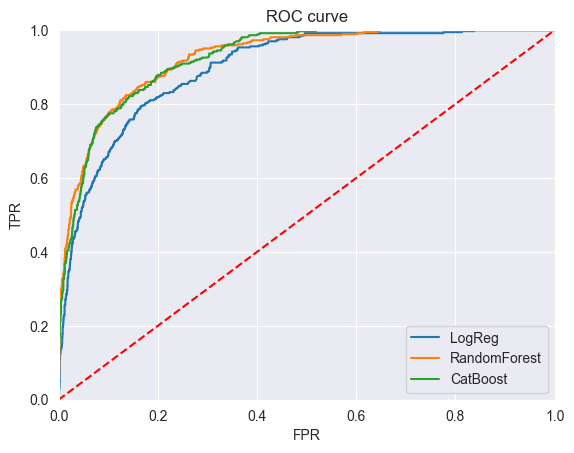

In [33]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_prob_lr)
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, y_prob_rfc)
fpr_cbc, tpr_cbc, thresholds = roc_curve(y_test, y_prob_cbc)
plt.plot(fpr_lr,tpr_lr, label='LogReg')
plt.plot(fpr_rfc, tpr_rfc, label='RandomForest')
plt.plot(fpr_cbc, tpr_cbc, label='CatBoost')
plt.xlim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid(True)